<font size ="8"> <div align="center">**Automobile Data Analysis using PCA and Clustering**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

-----------------------------
# **Context of the Case Study (Auto-mpg Analysis)**

-----------------------------

<p align =  "justify" >
In this case study, a dataset containing information about vehicles and their specifications as well as their corresponding performance is looked into. In this project, we aim to generate and visualize the principal component analysis for this auto-mpg dataset and extract useful insights.

-----------------------------
## **Data Description**
-----------------------------
There are 8 variables in the data:

- **mpg:** miles per gallon
- **cyl:** number of cylinders
- **disp:** engine displacement (cu. inches) or engine size
- **hp:** horsepower
- **wt:** vehicle weight (lbs.)
- **acc:** time taken to accelerate from O to 60 mph (sec.)
- **yr:** model year
- **car name:** car model name

---
## **Objectives of the Study**
---
<p align =  "justify" >
The main goal of this exercise is to perform data analysis of vehicle data and generate useful insights. Dimensionality reduction methods may be employed to see whether any other additional information can be gleaned

### **Importing necessary libraries and overview of the dataset**

**Importing the Libraries**

In [23]:
# Importing the pertinent python libraries

import pandas as pd                 # For Data organization, manipulation, and processing
import numpy as np
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns

# For scaliing the data using z-score
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

**Mounting Google Drive to Import Data**

In [2]:
# Mounting Google Drive Folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the data and taking a quick look**

In [6]:
# Reading the CSV file
path = '/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/3 Unsupervised Learning - Making Sense of Unstructured Data /1 Practice Case Studies/2 Auto-mpg Analysis/Dataset - Auto-mpg.csv'
data = pd.read_csv(path)

In [7]:
# Taking a quick glance at the first 5 rows of the data
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


**Check the datatypes of the data entries**

In [8]:
# Using info() to print a concise summary of the DataFrame entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Quick Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. There is a need to check this column

### **Data Preprocessing and Exploratory Data Analysis**

**Checking the car name column**

In [9]:
# Getting the number of unique entries in the 'car name' column
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [10]:
# dropping car_name column
data1 = data.copy()
data = data.drop(['car name'], axis=1)

**Checking values in horsepower column**

In [11]:
# checking if there are values other than digits in the column 'horsepower'
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print the part of the data in where hpIsDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- These missing values can be imputed, and have the data type of horsepower column changed.
- First, the ? needs to be replaced with np.nan.

In [19]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


* From these results, all the 6 instances with `'?'` horsepower values have been replaced with `NaN`

In [24]:
# converting the hp column from object data type to float
data['horsepower'] = data['horsepower'].astype('float')

# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)

**Getting Summary Statistics**

In [25]:
# Printing out the statistical summary of the Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

- The average mileage is approx 23 miles per gallon.
- The average number of cylinders is approx 5.
- The average displacement is approx 193 cubic inches with a large standard deviation of approx 104 cubic inches.
- The average horsepower is 104.
- The average weight is approx 2970 lbs.
- The average acceleration is approx 15 sec for reaching 0 to 60 mph speed.
- The model year ranges from 1970 to 1982.

**Checking the distribution and outliers for each column in the data**

mpg
Skew : 0.46


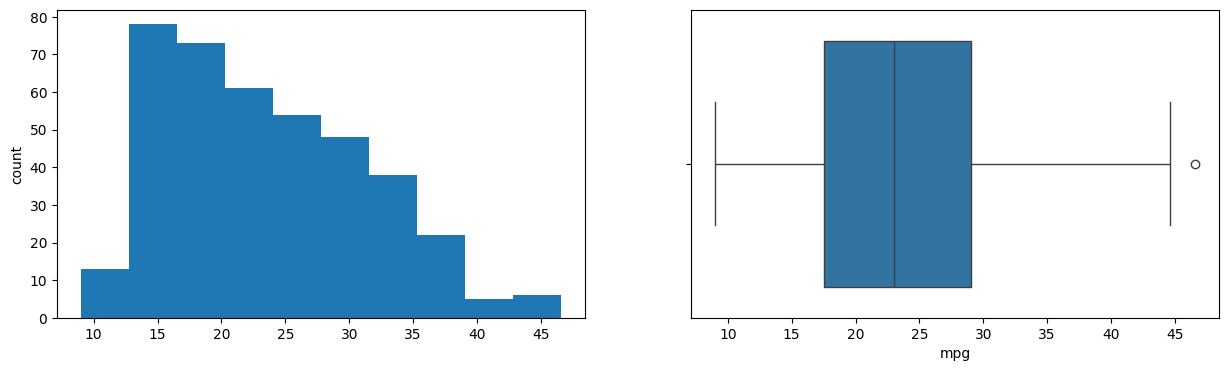

cylinders
Skew : 0.53


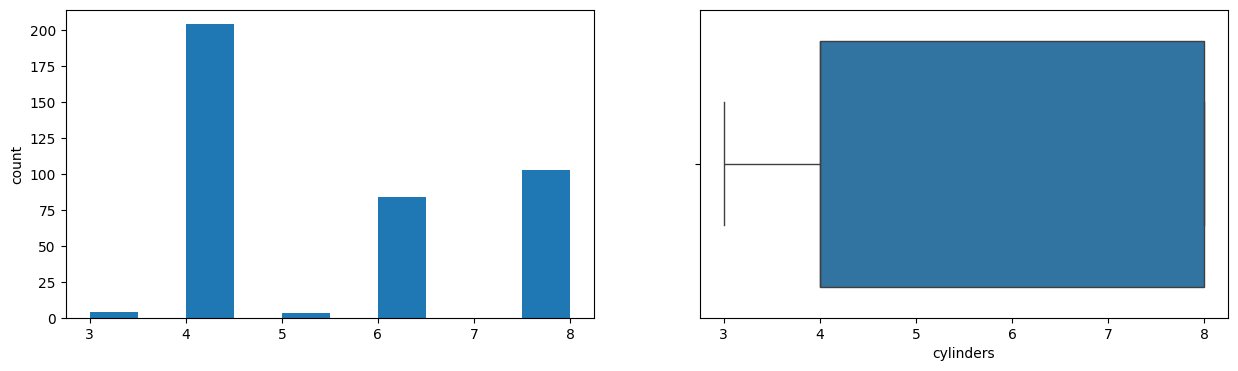

displacement
Skew : 0.72


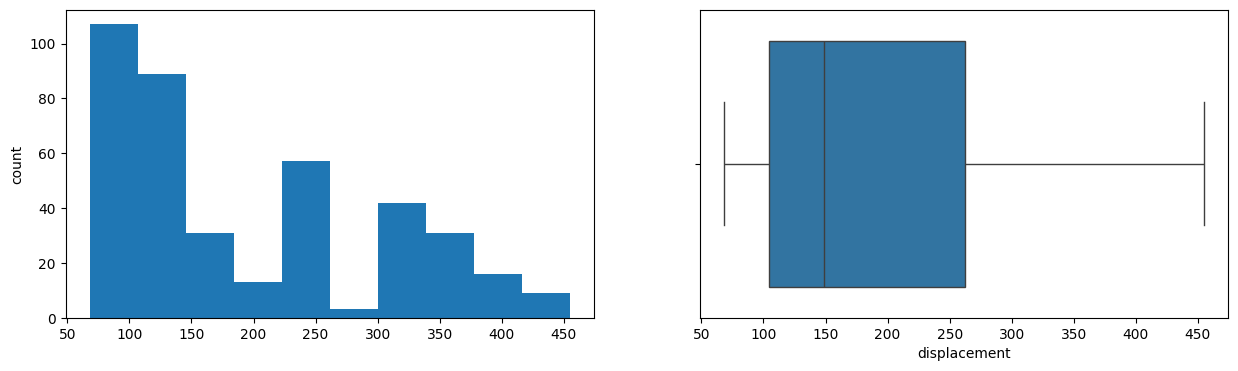

horsepower
Skew : 1.11


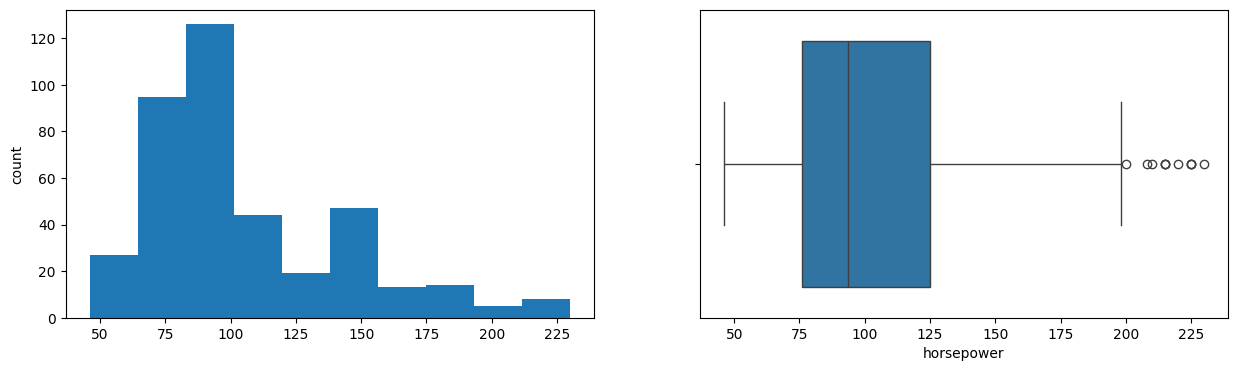

weight
Skew : 0.53


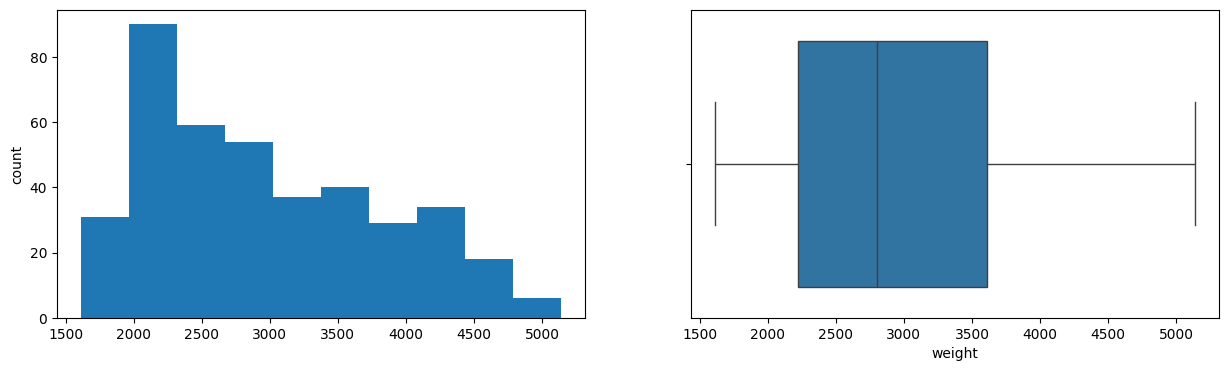

acceleration
Skew : 0.28


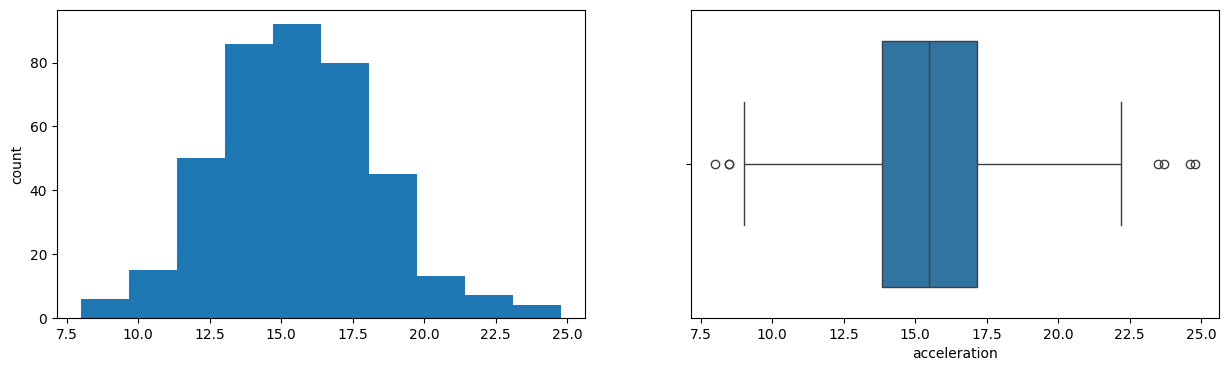

model year
Skew : 0.01


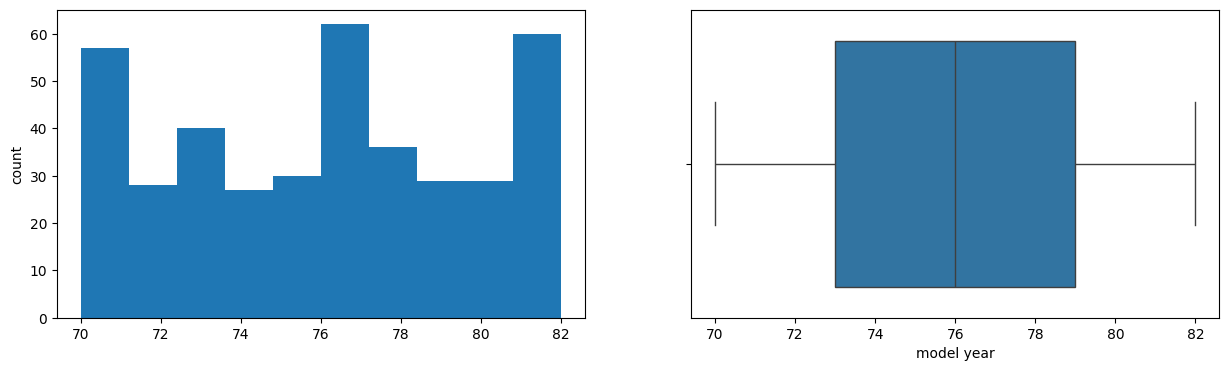

In [26]:
# Plotting histogram and boxplots for each of the columns in the data

for col in data.columns:
    print(col)
    # Plotting the Histogram
    print('Skew :', round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')

    # Plotting the Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**
- The mpg, displacement, weight columns are right skewed.
- The most common number of cylinders is 4, followed by 8, and 6.
- The acceleration is normally distributed.
- Most number of cars are 76 or 77 year model.
- Save for horsepower and acceleration, no other variables have very extreme values in the data.

**Checking the correlation between variables**

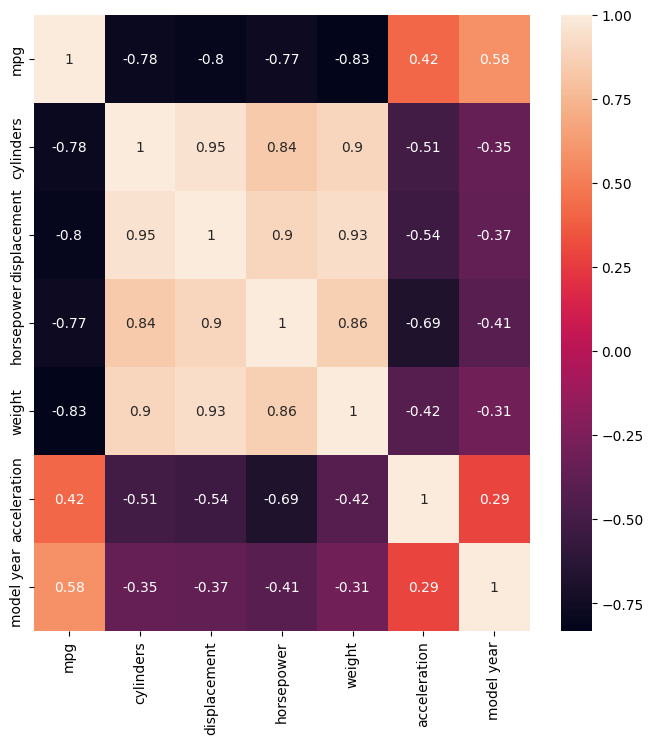

In [27]:
# Generating a heatmap showing the correlation between variables
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

### **Carrying out Principal Component Analysis**

**Scaling the data**

In [28]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [29]:
# Taking a glimpse of the scaled data
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


**Initializing PCA algorithm**

In [30]:
# Defining the number of principal components to generate
n=data_scaled.shape[1]

# Finding the 7 principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

**Visualizing the explained variance with respect to number of principal components considered**

Text(0, 0.5, 'Cumulative Explained Variance')

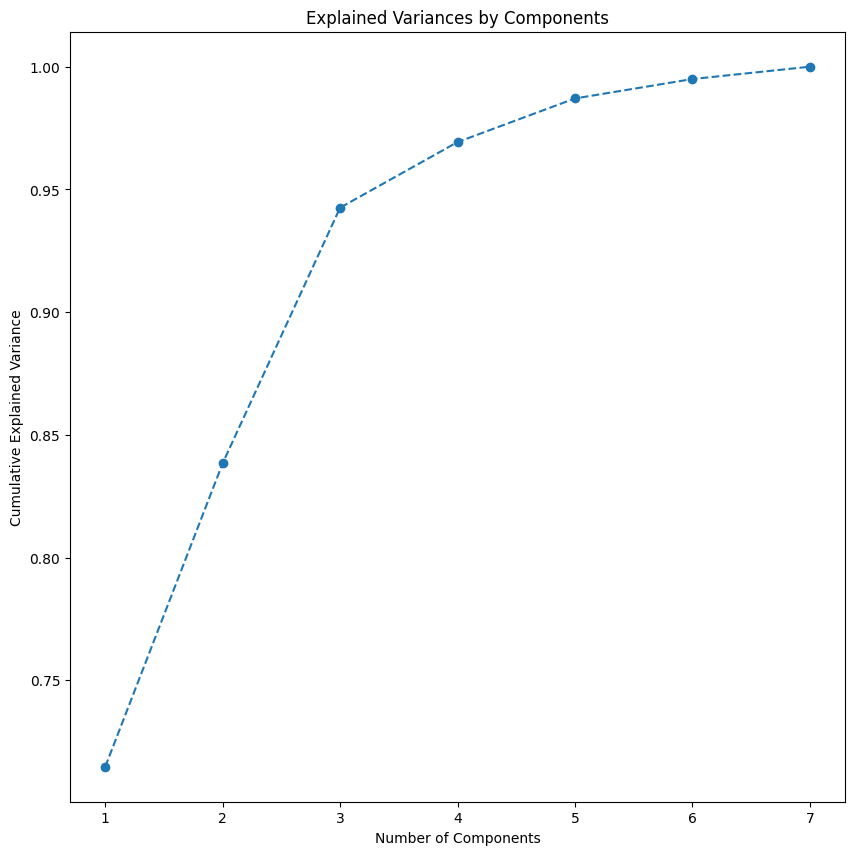

In [31]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [32]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations**:
-  We can see that out of the 7 original features, we reduced the number of features through principal components to 3, these components explain more than 90% of the original variance.
- So that is about 57% reduction in the dimensionality with a loss of 10% in variance.
- Let us now look at these principal components as a linear combination of original features.

In [33]:
# Displaying the 3 principal components and their breakdown in terms of the original features
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,0.21,-0.26
cylinders,0.42,0.19,0.14
displacement,0.43,0.18,0.10
horsepower,0.42,0.09,-0.17
weight,0.41,0.22,0.28
acceleration,-0.28,-0.02,0.89
model year,-0.23,0.91,-0.02


In [34]:
# Creating a function that distinguishes large and small coefficients
# The threshold absolute value set here is 0.40
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,0.210000,-0.260000
cylinders,0.420000,0.190000,0.140000
displacement,0.430000,0.180000,0.100000
horsepower,0.420000,0.090000,-0.170000
weight,0.410000,0.220000,0.280000
acceleration,-0.280000,-0.020000,0.890000
model year,-0.230000,0.910000,-0.020000


**Observations:**

- Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

> 0.40 * mpg + 0.42 * cylinders + 0.43 * displacement + 0.42 * horsepower + 0.41 * weight - 0.28 * acceleration - 0.23 * model year

- Principal Component 1:
  * The first principal component, PC1, is a measure of mpg, cylinders, displacement, horsepower, and weight
  * PC1 is associated with high scores of all these variables, except mpg, as these variables have positive weights.
  * PC1 is associated with low values of mpg.
  * <p align = "justify"> This principal component seems to capture attributes that generally define cars with heavy engines with high number of cylinders, displacement, horsepower and weight and a a result of heavy engines such cars would have low mileage.

- Principal Component 2: PC2, is a measure of model year. PC2 is associated with low values of model year.
- The third principal component, PC3, is a measure of the acceleration.

**Visualizing the data inn 2 dimensions using first two principal components**

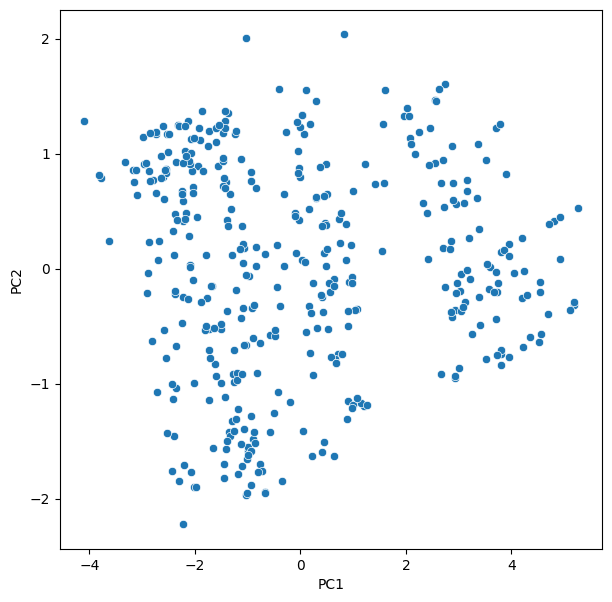

In [35]:
# Generating the scatterplot of the dataset recasted into 2 dimensions
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

* The scatterplot displays how the 398 datapoints are plotted along the first two principal components
* From the figure, no distinct groups can be identified yet

Text(0, 0.5, 'PC2')

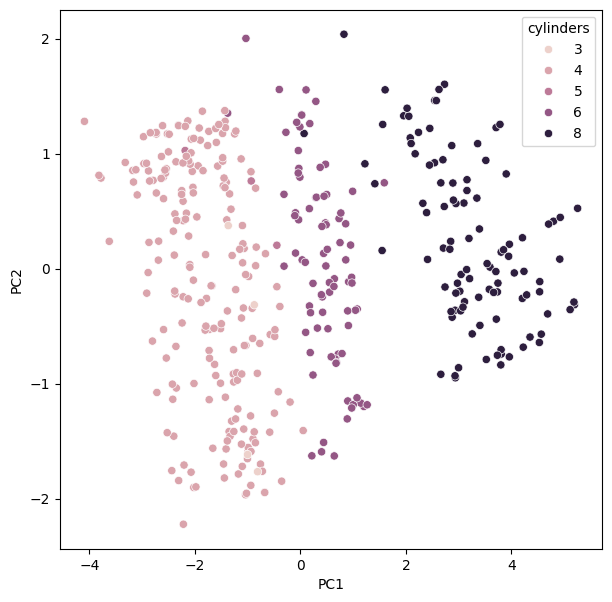

In [36]:
# Adding Hue to the plot according to 'cylinders'
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='cylinders')
plt.xlabel("PC1")
plt.ylabel("PC2")

- We can see there are 3 groups:
    - One with 3, 4, or 5 number of cylinders
    - One with 6 numbers of cylinders
    - One with 8 number of cylinders
- However, the distinction between the groups is not strong and there are some overlaps.

### **Tring out t-SNE Dimensionality Reduction**

In [39]:
# Initializing t-SNE Algorithm for the Data for 2 components
tsne = TSNE(n_components = 2, random_state=1)
data_tsne = tsne.fit_transform(data_scaled)
data_tsne.shape

(398, 2)

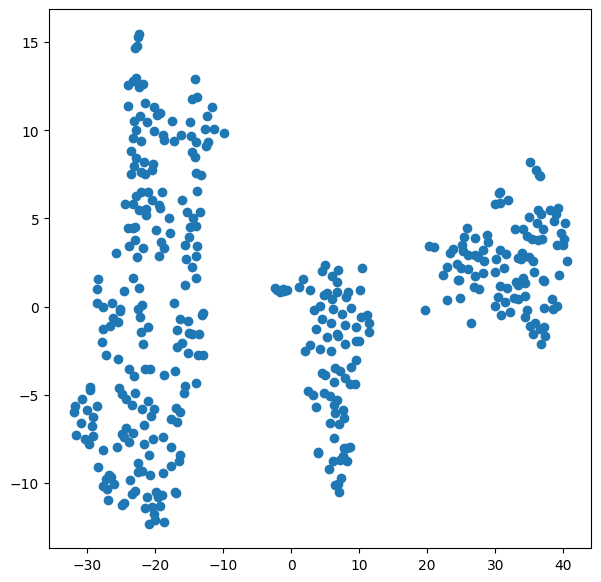

In [40]:
# Plotting the t-SNE results

x_tsne = data_tsne[:,0]
y_tsne = data_tsne[:,1]
plt.figure(figsize=(7,7))
plt.scatter(x_tsne, y_tsne)
plt.show()

* Similar to the PCA resutls, 3 groups are distinguished
* However, contrary to PCA results, the 3 groups identified by t-SNE algorithms are clearer and with little to no overlap between groups

## **Results and Conclusion**

- We have effectively reduced the dimensionality of the automobile dataset
- From the PCA results, the given dataset can be recasted into 3 principal components to retain 90% of the explained variance
- Upon plotting the reduced data set across two PCA axes, 3 groups/clusters were identified
- These 3 groups became more apparent upon using t-SNE algorithm instead of PCA